<a href="https://colab.research.google.com/github/lonanni/WaterNets/blob/main/SatelliteTrainingDataDownload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download LandSat8 images of Portsmouth area between 2017 to 2024**

we use the WaterNets python package

In [1]:
!pip install git+https://github.com/lonanni/WaterNets

  Cloning https://github.com/lonanni/WaterNets to /tmp/pip-req-build-q6q7lsli
  Running command git clone --filter=blob:none --quiet https://github.com/lonanni/WaterNets /tmp/pip-req-build-q6q7lsli
  Resolved https://github.com/lonanni/WaterNets to commit a033d5b17531ede8a416faf2ee797738e0d8f917
  Preparing metadata (setup.py) ... done


In [2]:
import WaterNets_project

In [3]:
import ee
import sys
import tempfile
import os

This notebook download data with the Google Earth Engine API, you need to create your credential for it. Find all the info from here: https://earthengine.google.com/

In [4]:
ee.Authenticate()

ee.Initialize(project="ee-lorenzananni")

We now the difne the loc and time of interest

In [7]:
from WaterNets_project import waternet_trainingdata as wt

In [8]:
pointlong, pointlat = 50.810993, -1.094974 # portsmouth location
toplat, toplong, botlat, botlong = wt.calculate_square_corners(pointlat, pointlong)

connect the drive to create a folder where to store the downloaded files

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
start_year = 2017
end_year=2024
# this is the path where the data are going to be stored
path= '/content/drive/MyDrive/TinyML/Satellite/WaterNets/Portsmouth'
if os.path.isdir(path) == False:
  os.mkdir(path)

In [18]:
sys.stdout = tempfile.TemporaryFile()

download = wt.MakeTrainingData_Water(
    path,
    toplat,
    toplong,
    botlat,
    botlong,
    start_year,
    end_year,
)


sys.stdout.close()
sys.stdout = sys.__stdout__

In [33]:
X, y = download.get_training_data_depth();


/usr/local/lib/python3.10/dist-packages/WaterNets_project/waternet_trainingdata.py:239: RuntimeWarning: divide by zero encountered in log
  depth[water_mask] = ((np.log(bgrnir[:, :, 0][water_mask])/np.log(bgrnir[:, :, 1][water_mask])))
/usr/local/lib/python3.10/dist-packages/WaterNets_project/waternet_trainingdata.py:239: RuntimeWarning: invalid value encountered in divide
  depth[water_mask] = ((np.log(bgrnir[:, :, 0][water_mask])/np.log(bgrnir[:, :, 1][water_mask])))


We now plot the RGB image, water mask, depth and depth + RGB image

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'depth mask +image')

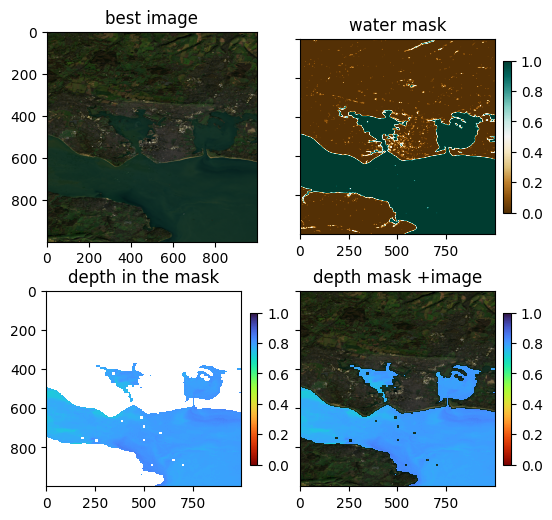

In [24]:
fig, axs = plt.subplots(2,2,sharey=True,figsize=(6,6))


download.plot_img(ax=axs[0,0])
axs[0,0].set_title("best image")

download.plot_watermask(ax=axs[0,1])
axs[0,1].set_title("water mask")

download.plot_depthmask(ax=axs[1,0])
axs[1,0].set_title("depth in the mask")


download.plot_depth(ax=axs[1,1])
axs[1,1].set_title("depth mask +image")

In [41]:
latlongstring = f'{pointlat}-{pointlong}'.replace('.', '_')


In [37]:
import numpy as np

In [44]:
np.savez(f"{path}/{latlongstring}.npz", X=X, y=y)